In [5]:
import os
import numpy as np
import pandas as pd
import geopandas as gp
from shapely.geometry import Point, Polygon

# GeoPandas - dataframes with geometry for GIS applications

### get some data - `read_file` is the ticket for GeoJSON, shapefiles, GDB, etc.

In [6]:
parks = gp.read_file('data/Madison_Parks.geojson')

### this now looks like a Pandas DataFrame but there's a special column `geometry`

In [7]:
parks.head()

OBJECTID Park_ID       Type  Acreage         Park_Name    ShortName  \
0      6416    3120       MINI     7.72  Quarry Cove Park  Quarry Cove   
1      6417    2610       MINI     2.36     Sunridge Park     Sunridge   
2      6418    3320       MINI     1.09    Lederberg Park    Lederberg   
3      6419    3020       MINI     3.22      Village Park      Village   
4      6420    1500  COMMUNITY    51.02         Olin Park         Olin   

  Subtype   SHAPESTArea  SHAPESTLength  \
0    None  3.363779e+05    2808.992197   
1    None  1.027629e+05    1284.462030   
2    None  4.752503e+04     940.774563   
3    None  1.402491e+05    1779.319445   
4    None  2.222246e+06   12658.852710   

                                            geometry  
0  POLYGON ((-89.48419 43.00851, -89.48416 43.010...  
1  POLYGON ((-89.48162 43.04065, -89.48160 43.041...  
2  POLYGON ((-89.53472 43.05151, -89.53511 43.052...  
3  POLYGON ((-89.28712 43.16125, -89.28711 43.161...  
4  MULTIPOLYGON (((-89.37630 43.05509, -89.37636 ...

### also some important metadata particularly the [CRS](https://en.wikipedia.org/wiki/Spatial_reference_system)

In [8]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

> ## pro tip: You can have multiple geometry columns but only one is _active_ -- this is important later as we do operations on GeoDataFrames. The column labeled `geometry` is typically the active one but you [you can change it](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_geometry.html).

## So what's up with these geometries? They are represented as [`shapely`](https://shapely.readthedocs.io/en/stable/manual.html) objects so can be:
- ### polygon / multi-polygon
- ### point / multi-point
- ### line / multi-line

## we can access with pandas `loc` and `iloc` references

In [9]:
parks.iloc[1].geometry.type

'Polygon'

In [10]:
parks.loc[parks.ShortName=='Olin'].geometry.type

4    MultiPolygon
dtype: object

### There are other cool shapely properties like `area`

In [11]:
parks.loc[parks.ShortName=='Olin'].geometry.area

/var/folders/gs/23hp3rd15qd6tyrfwt0r90qxz48f2r/T/ipykernel_97142/2331563363.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks.loc[parks.ShortName=='Olin'].geometry.area


4    0.000023
dtype: float64

### ruh-roh - what's up with this CRS and tiny area number?

In [12]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## area units in lat/long don't make sense. Let's project to something in meters (but how?)

In [13]:
parks.to_crs(3071, inplace=True)
parks.crs

<Derived Projected CRS: EPSG:3071>
Name: NAD83(HARN) / Wisconsin Transverse Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Wisconsin.
- bounds: (-92.89, 42.48, -86.25, 47.31)
Coordinate Operation:
- name: Wisconsin Transverse Mercator 83
- method: Transverse Mercator
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
parks.loc[parks.ShortName=='Olin'].geometry.area

4    206286.146769
dtype: float64

### there are loads of useful methods for `shapely` objects for relationships between geometries (intersection, distance, etc.) but we will skip these for now because GeoPandas facilitates these things for entire geodataframes! #sick

## So back to GeoDataFrames.....we can look at them spatially as well with `plot()`

<AxesSubplot: >

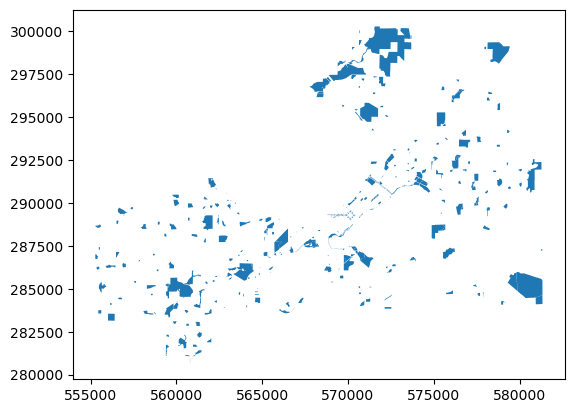

In [15]:
parks.plot()

## easily make a chloropleth map using a selected column as the color (and add a legend)

In [16]:
parks.columns

Index(['OBJECTID', 'Park_ID', 'Type', 'Acreage', 'Park_Name', 'ShortName',
       'Subtype', 'SHAPESTArea', 'SHAPESTLength', 'geometry'],
      dtype='object')

In [17]:
parks.sample(4)

OBJECTID Park_ID          Type    Acreage                      Park_Name  \
256      6676    2220  NEIGHBORHOOD  38.970001  Greentree - Chapel Hills Park   
40       6456    2650  NEIGHBORHOOD   5.980000              Odana School Park   
247      6667    1930          MINI   1.030000          Slater (William) Park   
122      6539    3200          MINI   3.030000         Churchill Heights Park   

                  ShortName Subtype   SHAPESTArea  SHAPESTLength  \
256  Greentree Chapel Hills    None  1.697639e+06    9523.121957   
40             Odana School    None  2.605606e+05    2054.778747   
247                  Slater    None  4.508054e+04     853.912000   
122           Churchill Hts    None  1.321536e+05    1538.029882   

                                              geometry  
256  POLYGON ((560463.280 285314.924, 560492.889 28...  
40   POLYGON ((563081.599 286668.246, 563155.248 28...  
247  POLYGON ((563603.629 286948.686, 563602.541 28...  
122  POLYGON ((576317.183 297164.512, 576317.268 29...

<AxesSubplot: >

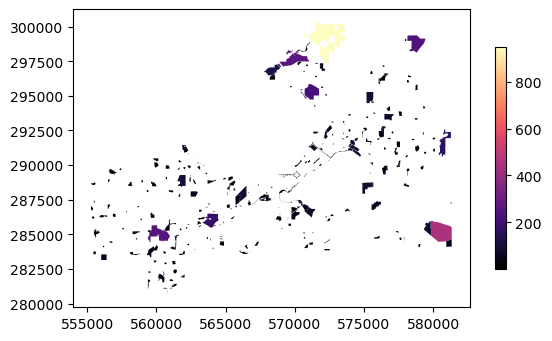

In [18]:
parks.plot(column="Acreage", cmap = 'magma', k=5, legend=True, legend_kwds={'shrink': 0.6})

## also a very cool interactive plot options with a basemap

In [19]:
parks.explore(column='Acreage', cmap='magma')

## we can read in another shapefile

In [20]:
hoods = gp.read_file('data/Neighborhood_Associations.geojson')

In [21]:
hoods.sample(5)

OBJECTID  NA_ID                               NEIGHB_NAME  STATUS  \
130      9977    169     Madison West Neighborhood Association  Active   
82       9929    109  Woodlands Condominium Owners Association  Active   
12       9859     14                     Capitol Neighborhoods  Active   
23       9870     29        Faircrest Neighborhood Association  Active   
73       9920     98       Walnut Grove Homeowners Association  Active   

                   CLASSIFICA  \
130  Neighborhood Association   
82    Condominium Association   
12   Neighborhood Association   
23   Neighborhood Association   
73   Neighborhood Association   

                                                   Web   ShapeSTArea  \
130  http://www.cityofmadison.com/neighborhoods/pro...  1.179120e+08   
82   http://www.cityofmadison.com/neighborhoods/pro...  6.436674e+05   
12   http://www.cityofmadison.com/neighborhoods/pro...  1.986487e+07   
23   http://www.cityofmadison.com/neighborhoods/pro...  8.982070e+06   
73   http://www.cityofmadison.com/neighborhoods/pro...  6.633789e+06   

     ShapeSTLength                                           geometry  
130  122060.125747  POLYGON ((-89.50317 43.04736, -89.50317 43.047...  
82     3218.192110  POLYGON ((-89.49492 43.07941, -89.49655 43.079...  
12    20186.797829  POLYGON ((-89.38155 43.08068, -89.38242 43.081...  
23    13299.850859  POLYGON ((-89.47855 43.06806, -89.47911 43.068...  
73    12264.366020  POLYGON ((-89.50245 43.07479, -89.50243 43.075...

### and we can plot these on top of each other

<AxesSubplot: >

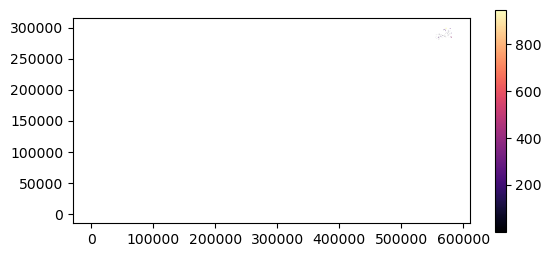

In [22]:
ax_hood = hoods.plot()
# now plot the other one but specify which axis to plot on (ax=ax_hood)
parks.plot(column="Acreage", cmap = 'magma', k=5, legend=True, legend_kwds={'shrink': 0.6}, ax=ax_hood)

## WAT! Why so far apart?

In [23]:
hoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## we need to reproject. Geopandas uses `to_crs()` for this purpose

In [24]:
# we can reproject, and set hoods to park crs 
hoods.to_crs(parks.crs, inplace=True)

<AxesSubplot: >

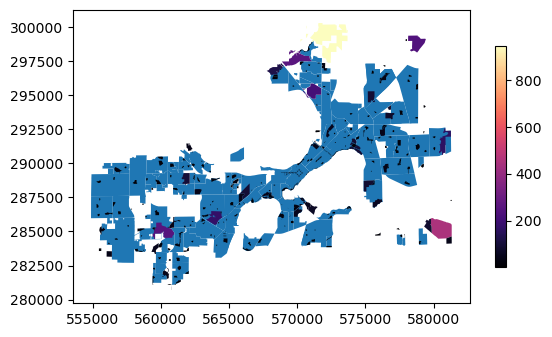

In [25]:
ax_hood = hoods.plot()
# now plot the other one but specify which axis to plot on (ax=ax_hood)
parks.plot(column="Acreage", cmap = 'magma', k=5, legend=True, legend_kwds={'shrink': 0.6}, ax=ax_hood)

## or similarly with the interactive maps

In [26]:
m_hood = hoods.explore()
parks.explore(column="Acreage", cmap = 'magma', k=5, legend=True, legend_kwds={'shrink': 0.6}, m=m_hood)

## we can make a new geodataframe using shapely properties of the geometry - how about centroids?

## TEST YOUR SKILLS #0
- make a new geodataframe of the parks
- add a columns with centroids for each park
- plot an interactive window with the park centroids and the neighborhoods
- hints: 
    - remember the shapely methods are available for each geometry object (e.g. `centroid()`) 
    - you can loop over the column in a couple different ways
    - you can define which columns contains the geometry of a geodataframe
    - you will likely have to define the CRS

# Operations on and among geodataframes...do I need to use a GIS program?

## Dissolve

In [48]:
hoods.dissolve() # note it defaults to filling all the columns with the first value

geometry  OBJECTID  NA_ID  \
0  MULTIPOLYGON (((560429.904 281602.442, 560430....      9847      1   

                                    NEIGHB_NAME  STATUS  \
0  Allied Dunn's Marsh Neighborhood Association  Active   

                 CLASSIFICA  \
0  Neighborhood Association   

                                                 Web   ShapeSTArea  \
0  http://www.cityofmadison.com/neighborhoods/pro...  1.512568e+07   

   ShapeSTLength  
0   16657.055614

<AxesSubplot: >

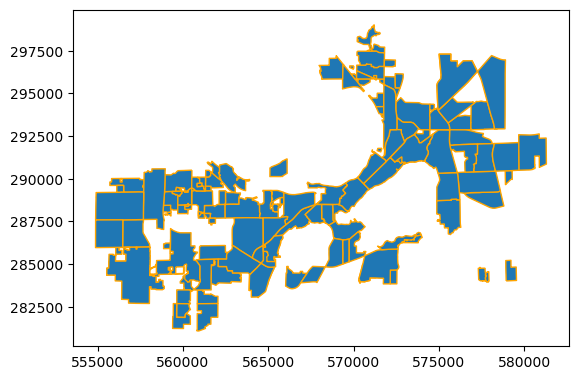

In [148]:
ax=hoods.dissolve().plot()
hoods.plot(facecolor=None, edgecolor='orange', ax=ax)

## Convex Hull

<AxesSubplot: >

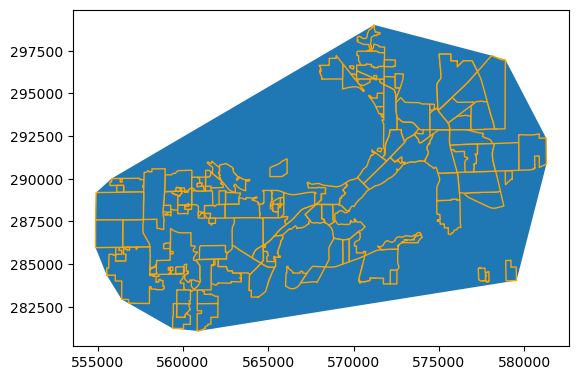

In [146]:
ax = hoods.dissolve().convex_hull.plot()
hoods.plot(facecolor=None, edgecolor='orange', ax=ax)

## Bounding Box

In [52]:
hoods.bounds # that's per each row

minx           miny           maxx           maxy
0    563872.429544  283460.518859  565328.837226  285057.462675
1    561310.621737  289288.751579  561646.281647  289570.375291
2    566010.016502  283558.607236  567270.271941  284869.636703
3    568527.624082  286423.950486  570669.728818  287657.510073
4    569018.771979  288242.314399  569250.882412  288506.627088
..             ...            ...            ...            ...
135  574180.047766  290323.744701  576068.029053  292858.768636
136  572143.872431  290896.914666  574663.138190  292637.318811
137  554878.971311  287588.991000  557696.123932  289229.663701
138  567269.204147  288485.712034  569627.785405  289802.439174
139  554873.114600  285970.029005  556474.561414  287596.015566

[140 rows x 4 columns]

In [81]:
tb = hoods.total_bounds # this gives overall bounds
tb

array([554873.11459994, 281085.59466762, 581291.42545321, 299016.88496873])

## We can make a polygon from these coordinates with `shapely`

In [57]:
from shapely.geometry import box

In [150]:
bbox = box(tb[0], tb[1], tb[2], tb[3])
# pro tip - when passing a bunch of ordered arguments, '*' will unpack them #nice
bbox = box(*hoods.total_bounds)

## to make a GeoDataFrame from scratch, the minimum you need is geometry, but a crs is important, and some data will populate more columns

In [153]:

hoods_boundary = gp.GeoDataFrame(data={'thing':['bounding_box']},geometry=[bbox], crs=hoods.crs)
hoods_boundary

thing                                           geometry
0  bounding_box  POLYGON ((581291.425 281085.595, 581291.425 29...

<AxesSubplot: >

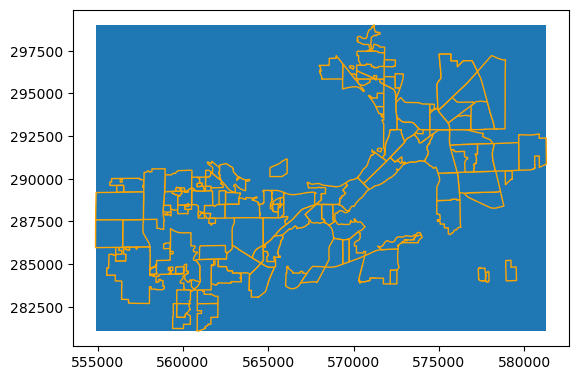

In [147]:
ax = hoods_boundary.plot()
hoods.plot(facecolor=None, edgecolor='orange', ax=ax)

# How about some spatial joins?

## we can bring in information based on locational overlap. Let's look at just a couple neighborhoods (Marquette and Tenny-Lapham) on the Isthmus

In [120]:
isthmus = hoods.loc[hoods['NEIGHB_NAME'].str.contains('Marquette') | 
                   hoods['NEIGHB_NAME'].str.contains('Tenney')]
isthmus

OBJECTID  NA_ID                             NEIGHB_NAME  STATUS  \
40      9887     49      Marquette Neighborhood Association  Active   
68      9915     92  Tenney-Lapham Neighborhood Association  Active   

                  CLASSIFICA  \
40  Neighborhood Association   
68  Neighborhood Association   

                                                  Web   ShapeSTArea  \
40  http://www.cityofmadison.com/neighborhoods/pro...  1.973684e+07   
68  http://www.cityofmadison.com/neighborhoods/pro...  1.333260e+07   

    ShapeSTLength                                           geometry  
40   23274.760528  POLYGON ((572818.456 291044.343, 572821.978 29...  
68   18614.467212  POLYGON ((571192.747 291561.285, 571106.236 29...

In [159]:
isthmus.explore()

In [158]:
isthmus.sjoin(parks).explore()

In [157]:
parks.sjoin(isthmus).explore()

### so, it matters which direction you join from. The geometry is preserved from the dataframe "on the left"
### equivalently, you can be more explicit in calling `sjoin`

In [156]:
gp.sjoin(left_df=parks, right_df=isthmus).explore()

In [155]:
isthmus_parks = gp.sjoin(left_df=parks, right_df=isthmus)

## we are going to use this `isthmus_parks` geoDataFrame a little later, but we want to trim out some unneeded and distracting columns. We can use `.drop()` just like with a regular Pandas DataFrame

In [161]:
isthmus_parks.columns

Index(['OBJECTID_left', 'Park_ID', 'Type', 'Acreage', 'Park_Name', 'ShortName',
       'Subtype', 'SHAPESTArea', 'SHAPESTLength', 'geometry', 'index_right',
       'OBJECTID_right', 'NA_ID', 'NEIGHB_NAME', 'STATUS', 'CLASSIFICA', 'Web',
       'ShapeSTArea', 'ShapeSTLength'],
      dtype='object')

In [162]:
isthmus_parks.drop(columns=[ 'index_right','OBJECTID_right', 'NA_ID', 'STATUS', 'CLASSIFICA', 'Web',
       'ShapeSTArea', 'ShapeSTLength'], inplace=True)

# Let's explore the various predicates with a small intersecting box

<AxesSubplot: >

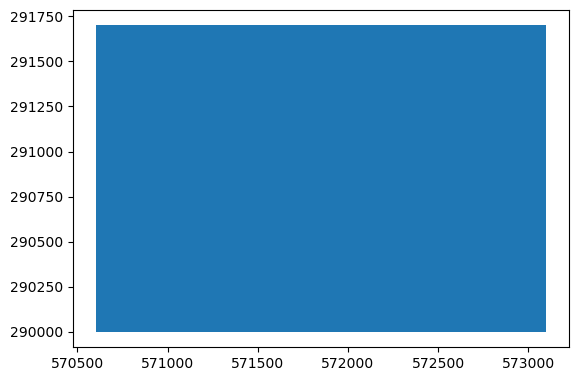

In [160]:
bbox = box(570600, 290000, 573100, 291700)
bounds = gp.GeoDataFrame(geometry=[bbox],crs=parks.crs)
bounds.plot()

## See [documentation](https://shapely.readthedocs.io/en/latest/manual.html#binary-predicates) for full set of options for predicates. We'll just check out a couple options: `intersects`, `contains`, `within`

# TEST YOUR SKILLS #1
Using the `bounds` geodataframe you just made, write a function to visualize predicate behaviors.
- your function should accept a left geodataframe, a right geodataframe, and a string for the predicate
- your function should plot:
    - the left geodataframe in (default) blue
    - the result of the spatial join operation in another color
    - the right geodataframe in another color with outline only
- then you should set the title of the plot to the string predicate value used
- the geodataframes to test with are `isthmus_parks` and `bounds`
- your function should `return` the joined geodataframe

- a couple hints:
    - in the `plot` method are a couple args called `facecolor` and `edgecolor` that will help plot the rectangle
    - there are other predicates to try out 

- _advanced options_: if that was easy, you can try a couple other things like:
    - explore joins with points and lines in addition to just polygons
    - change around the `bounds` polygon dimensions 
    - use `explore()` to make an interactive map

# Spatial joins are particularly useful with collections of points. A common case is to add a polygon attribute to points falling within each polygon. Let's check out a bigger point dataset with all the trees on streets in Madison

<AxesSubplot: >

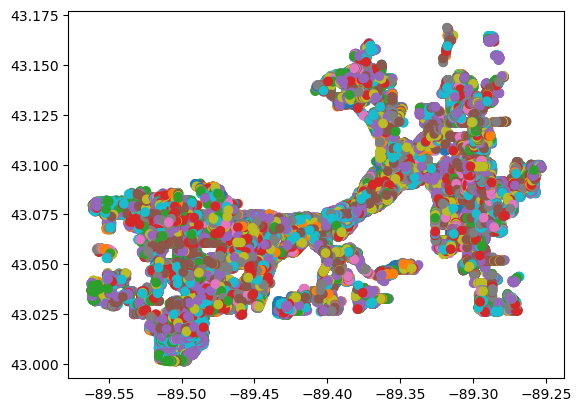

In [173]:
trees = gp.read_file('data/Street_Trees.geojson', index_col=0)
trees.plot(column='SPECIES')

## let's put this into the same crs as neighborhoods and join the data together so we can have a neighborhood attribute on the trees geodataframe

In [174]:
trees.to_crs(hoods.crs, inplace=True)

In [175]:
hoods.columns

Index(['OBJECTID', 'NA_ID', 'NEIGHB_NAME', 'STATUS', 'CLASSIFICA', 'Web',
       'ShapeSTArea', 'ShapeSTLength', 'geometry'],
      dtype='object')

## NOTE: if we pass only some columns of the GeoDataFrame, only those columns will be included in the result, which is cool. _But_ - must include the active geometry column as well!

In [180]:
trees_with_hoods = trees[['SPECIES','DIAMETER','geometry']].sjoin(hoods[['NEIGHB_NAME','geometry']])
trees_with_hoods

SPECIES  DIAMETER                       geometry  index_right  \
0          554      22.0  POINT (569406.122 285635.225)            6   
1          554      20.0  POINT (569391.615 285635.545)            6   
2          320      14.0  POINT (569383.333 285772.643)            6   
3          320      20.0  POINT (569407.725 285782.686)            6   
4          320      20.0  POINT (569431.459 285792.707)            6   
...        ...       ...                            ...          ...   
103149     742      26.0  POINT (572436.361 296111.684)          106   
103223     057      13.0  POINT (572438.088 296079.464)          106   
103224     762      10.0  POINT (572437.822 296060.693)          106   
103225     317      34.0  POINT (572440.804 296031.334)          106   
103226     544      29.0  POINT (572445.711 295696.701)          106   

                                     NEIGHB_NAME  
0       Bram's Addition Neighborhood Association  
1       Bram's Addition Neighborhood Association  
2       Bram's Addition Neighborhood Association  
3       Bram's Addition Neighborhood Association  
4       Bram's Addition Neighborhood Association  
...                                          ...  
103149    Majestic Oaks Neighborhood Association  
103223    Majestic Oaks Neighborhood Association  
103224    Majestic Oaks Neighborhood Association  
103225    Majestic Oaks Neighborhood Association  
103226    Majestic Oaks Neighborhood Association  

[108937 rows x 5 columns]

# now we can do a groupby, for example, to find things like the average or max diameter of trees in each neighborhood

<AxesSubplot: xlabel='NEIGHB_NAME'>

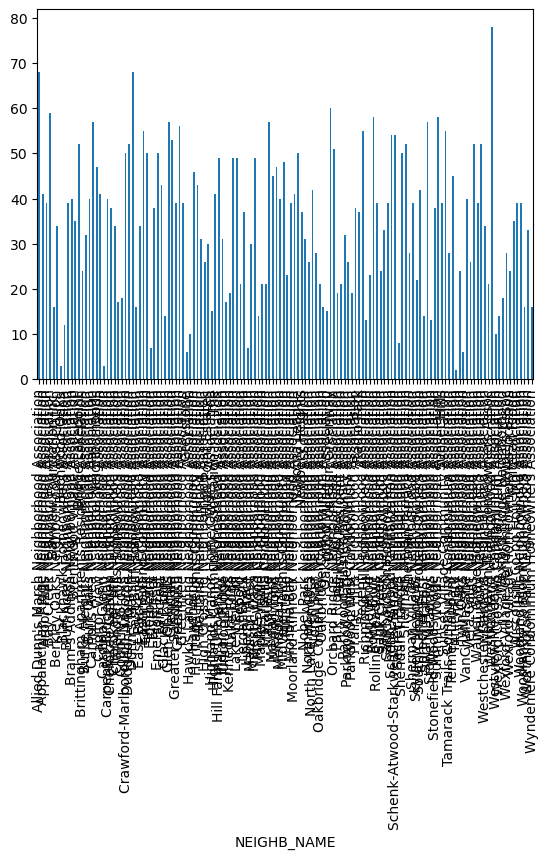

In [184]:
trees_with_hoods.groupby('NEIGHB_NAME')['DIAMETER'].max().plot(kind='bar')

# we can flip this back to the original neighborhoods GeoDataFrame to make a more useful spatial plot

In [192]:
hood_trees = hoods.copy()
tree_summary = trees_with_hoods.groupby('NEIGHB_NAME')['DIAMETER'].max()
hood_trees.merge(tree_summary,
                left_on = 'NEIGHB_NAME', right_on='NEIGHB_NAME').explore(column="DIAMETER")

## As we've seen, spatial joins are powerful, but they really only gather data from multiple collections. What if we want to actually calculate the amount of overlap among shapes? Or create new shapes based on instersection or not intersection of shapes? [`overlay`](https://geopandas.org/en/stable/docs/user_guide/set_operations.html?highlight=overlay) does these things.

In [110]:
len(parks_cent), len(hoods)

(281, 140)

In [116]:
hoods

OBJECTID  NA_ID                                        NEIGHB_NAME  \
0        9847      1       Allied Dunn's Marsh Neighborhood Association   
1        9848      2         Appalachian Ridge Neighborhood Association   
2        9849      3               Arbor Hills Neighborhood Association   
3        9850      4                 Bay Creek Neighborhood Association   
4        9851      5                            Bayview Foundation Inc.   
..        ...    ...                                                ...   
135      9982     24                  Eastmorland Community Association   
136      9983    114  Schenk-Atwood-Starkweather-Yahara Neighborhood...   
137      9984    180                Elderberry Neighborhood Association   
138      9985     44               Campus Area Neighborhood Association   
139      9986    185                                     Birchwood-Oaks   

     STATUS                CLASSIFICA  \
0    Active  Neighborhood Association   
1    Active  Neighborhood Association   
2    Active  Neighborhood Association   
3    Active  Neighborhood Association   
4    Active      Resident Association   
..      ...                       ...   
135  Active  Neighborhood Association   
136  Active  Neighborhood Association   
137  Active  Neighborhood Association   
138  Active  Neighborhood Association   
139  Active  Neighborhood Association   

                                                   Web   ShapeSTArea  \
0    http://www.cityofmadison.com/neighborhoods/pro...  1.512568e+07   
1    http://www.cityofmadison.com/neighborhoods/pro...  9.918189e+05   
2    http://www.cityofmadison.com/neighborhoods/pro...  9.987933e+06   
3    http://www.cityofmadison.com/neighborhoods/pro...  1.603760e+07   
4    http://www.cityofmadison.com/neighborhoods/pro...  3.764334e+05   
..                                                 ...           ...   
135  http://www.cityofmadison.com/neighborhoods/pro...  3.460758e+07   
136  http://www.cityofmadison.com/neighborhoods/pro...  2.526434e+07   
137  http://www.cityofmadison.com/neighborhoods/pro...  4.860913e+07   
138  https://www.cityofmadison.com/neighborhoods/pr...  1.613891e+07   
139  http://www.cityofmadison.com/neighborhoods/pro...  2.769340e+07   

     ShapeSTLength                                           geometry  
0     16657.055614  POLYGON ((565125.695 284820.776, 565109.166 28...  
1      3985.709673  POLYGON ((561420.948 289289.138, 561592.482 28...  
2     14913.568833  POLYGON ((566428.051 284487.098, 566428.936 28...  
3     19820.043890  POLYGON ((570185.455 287480.573, 570175.901 28...  
4      2605.415004  POLYGON ((569250.882 288429.600, 569194.799 28...  
..             ...                                                ...  
135   25477.602525  POLYGON ((575735.442 291568.868, 575716.105 29...  
136   26539.960543  POLYGON ((574449.168 292044.028, 574453.488 29...  
137   28896.709835  POLYGON ((554879.498 287588.991, 556474.561 28...  
138   26900.881225  POLYGON ((567811.177 288511.184, 567921.775 28...  
139   21047.470748  POLYGON ((554879.498 287588.991, 554873.115 28...  

[140 rows x 9 columns]

In [100]:
trees = gp.read_file('data/Street_Trees.geojson', index_col=0)
trees

OBJECTID SPECIES  DIAMETER                    geometry
0              1     554      22.0  POINT (-89.39345 43.04181)
1              2     554      20.0  POINT (-89.39363 43.04181)
2              3     320      14.0  POINT (-89.39372 43.04305)
3              4     320      20.0  POINT (-89.39341 43.04314)
4              5     320      20.0  POINT (-89.39312 43.04323)
...          ...     ...       ...                         ...
112506    119109     462       2.0  POINT (-89.50595 43.07467)
112507    119110     804       2.0  POINT (-89.50715 43.07292)
112508    119111     734       2.0  POINT (-89.51320 43.07185)
112509    119112     804       2.0  POINT (-89.51323 43.07219)
112510    119113     734       2.0  POINT (-89.50883 43.07116)

[112511 rows x 4 columns]

<AxesSubplot: >

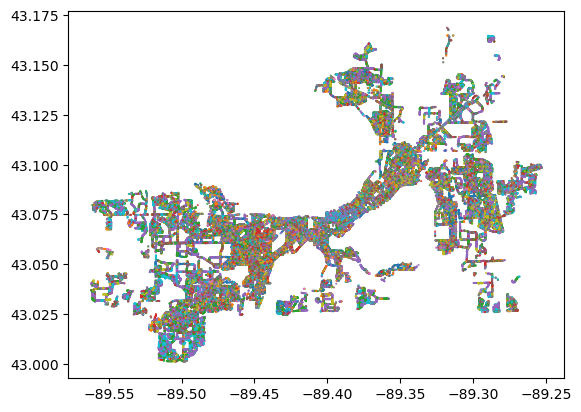

In [97]:
trees.plot(markersize=.2, column='SPECIES')

# a little aside on spatial joins

In [ ]:
# let's zoom in on a small area to look at
croprot.plot()
plt.xlim([550000,555000])
plt.ylim([400000, 405000])


In [ ]:
# we can cook up a polygon and yank out only the polygons within it


In [ ]:
subset = Polygon([(550000,400000),
                  (550000,405000), 
                  (555000,405000),
                  (555000,400000),
                 (550000,400000)])
subgdf = gp.GeoDataFrame({'outline':['p0'],
                         'geometry':[subset]},
                        crs=croprot.crs)

In [ ]:
subgdf.plot()

In [ ]:
croprot_sub = gp.overlay(croprot, subgdf)

In [ ]:
# we need to cook up a dataframe real quick once
pt_df = gp.GeoDataFrame({'ptname':['pt0','pt1'],
                        'geometry':[Point(554000,403000),
                                   Point(552000,403000)]},
                       crs=croprot.crs)

In [ ]:
pt_df

In [ ]:
# we can pick a point at which we want attributes
ax = croprot_sub.plot()

pt_df.plot(marker='*', facecolor='orange', markersize=50, ax=ax)

# sadly, labeling points is BRUTAL
for x,y,label in zip(pt_df.geometry.x, pt_df.geometry.y, pt_df.ptname):
    ax.annotate(label, xy=(x,y), xytext=(3,3), size=14, textcoords = "offset points")


In [ ]:
gp.sjoin(croprot_sub, pt_df, predicate='intersects')

In [ ]:
# Let's add a polygon
poly_df = gp.GeoDataFrame({'polname':['p0'],
                        'geometry':[Polygon([(554000,403000),
                                            (552000,403000),
                                            (553000,402000),
                                            (554000,402000),
                                            (554000,403000)])]},
                       crs=croprot.crs)


In [ ]:
ax = croprot_sub.plot()

poly_df.plot(ax=ax, facecolor='none', edgecolor='orange')

In [ ]:
# there are a few ways to spatially join. Let's check them out

In [ ]:
ax = croprot_sub.plot()
gp.sjoin(croprot_sub, poly_df, predicate='intersects').plot(ax=ax, facecolor='k')
poly_df.plot(ax=ax, facecolor='none', edgecolor='orange')
plt.title('instersects')

In [ ]:
ax = croprot_sub.plot()
gp.sjoin(croprot_sub, poly_df, predicate='contains').plot(ax=ax, facecolor='k')
poly_df.plot(ax=ax, facecolor='none', edgecolor='orange')
plt.title('contains')

In [ ]:
ax = croprot_sub.plot()
gp.sjoin(croprot_sub, poly_df, predicate='within').plot(ax=ax, facecolor='k')
poly_df.plot(ax=ax, facecolor='none', edgecolor='orange')
plt.title('within')

In [ ]:
ax = croprot_sub.plot()
gp.sjoin(poly_df, croprot_sub, predicate='contains').plot(ax=ax, facecolor='k')
poly_df.plot(ax=ax, facecolor='none', edgecolor='orange')
plt.title('contains from the opposite direction')

# now back to the main goal

In [ ]:
croprot.plot(column='rotation', legend=True, figsize=(10,10))


In [ ]:
# we will need bounding boxes for the inset models
pfl_bbox = gp.read_file('../plainfield-lakes-lgr/pst_setup/postproc/shps/pfl_lgr_parent_bbox.shp')
plsnt_bbox = gp.read_file('../pleasant-lake-lgr/pst_setup/postproc/shps/plsnt_lgr_parent_bbox.shp')


In [ ]:
# we will need to trim this to the model boundary
regional_bbox = gp.read_file('../gis/centralsands/model_domain_poly.shp').to_crs(pfl_bbox.crs)
regional_bbox.crs

In [ ]:
# let's intersect the main coverage with just the two insets

In [ ]:
gp.overlay(croprot,pfl_bbox, how='intersection')

In [ ]:
# 'doh! let's reproject

In [ ]:
croprot = croprot.to_crs(pfl_bbox.crs)

In [ ]:
# WTH? NoneType???
croprot

In [ ]:
croprot = croprot.dropna()
croprot

In [ ]:
# try again
croprot = croprot.to_crs(pfl_bbox.crs)

In [ ]:
croprot.crs

In [ ]:
pfl_LU = gp.overlay(croprot,pfl_bbox, how='intersection')

In [ ]:
#sweet! no warning about crs

In [ ]:
croprot = gp.overlay(croprot, regional_bbox, how='intersection')

In [ ]:
ax = croprot.plot(column='rotation', legend=True, figsize=(10,10))
pfl_bbox.plot(ax=ax, facecolor="none", edgecolor='black')
plsnt_bbox.plot(ax=ax, facecolor="none", edgecolor='black')
regional_bbox.plot(ax=ax, facecolor="none", edgecolor='black')

In [ ]:
ax = pfl_LU.plot(column='rotation', legend=True)
pfl_bbox.plot(ax=ax, facecolor="none", edgecolor='black')

In [ ]:
# let's bring in the lakes to plot as well
alllakes = gp.read_file('../gis/centralsands/all_lakes.shp')

In [ ]:
# make sure in the correct CRS
assert alllakes.crs == pfl_bbox.crs

In [ ]:
pfl_lakes = gp.overlay(alllakes, pfl_bbox, how='intersection')
plsnt_lakes = gp.overlay(alllakes, plsnt_bbox, how='intersection')


In [ ]:
ax = pfl_LU.plot(column='rotation', legend=True)
pfl_bbox.plot(ax=ax, facecolor="none", edgecolor='black')
pfl_lakes.plot(ax=ax, facecolor="blue")

In [ ]:
plsnt_LU = gp.overlay(croprot,plsnt_bbox, how='intersection')

In [ ]:
ax = plsnt_LU.plot(column='rotation', legend=True)
plsnt_bbox.plot(ax=ax, facecolor="none", edgecolor='black')
plsnt_lakes.plot(ax=ax, facecolor="blue")

In [ ]:
# let's get nutty with the legend 

In [ ]:
plsnt_LU.rotation.unique()

In [ ]:
# grab some colors form the interwebs
# https://htmlcolorcodes.com/color-names/
rotcolors = {'non-ag':'Black',
             'cash_grain':'DarkGreen',
             'dairy': 'Orange',
             'potato/veg': 'SlateGrey',
             'pasture/hay': 'Gold'
            }
rotnames ={'non-ag':'Non Agriculture',
             'cash_grain':'Cash Grain',
             'dairy': 'Dairy',
             'potato/veg': 'Potato/Vegetable',
             'pasture/hay': 'Pasture/Hay'
            }

##### read in the non-ag landuse 

In [ ]:
nonag_lu = gp.read_file('shapefiles/no_irrigation_LU/irr_parcel_reclass_20210212/irr_parcel_reclass_20210212.shp')
nonag_lu.crs

In [ ]:
nonag_lu = nonag_lu.to_crs(pfl_bbox.crs)
nonag_lu.crs

In [ ]:
# read in the code lookup for nonag
nonag_lookup = pd.read_csv('shapefiles/no_irrigation_LU/wiscland_xref.csv', index_col = 0)

In [ ]:
nonag_lookup.head()


In [ ]:
nonag_lookup.loc[2100]['label']

In [ ]:
# we can do normal pandas things
nonag_lu.wl_lev2_cd = [nonag_lookup.loc[i,'label'] for i in nonag_lu.wl_lev2_cd]

In [ ]:
nonag_lu.loc[nonag_lu.wl_lev2_cd == 'Crop Rotation', 'wl_lev2_cd'] = 'Nonirrigated Agriculture'

In [ ]:
# and change "Crop Rotation" label to "Nonirrigated Agriculture"
ax = nonag_lu.plot(column = 'wl_lev2_cd', legend=True, figsize=(10,10))
regional_bbox.plot(ax=ax, edgecolor="k", facecolor='none' )

In [ ]:
from Figures import ReportFigures

rf = ReportFigures()
rf.set_style()
default_aspect = 6 / 8.0 # h/w
tall_aspect = 7 / 8.0
singlecolumn_width = 21/6.0
doublecolumn_width = 42/6.0

singlecolumn_size = (singlecolumn_width, singlecolumn_width * default_aspect)
singlecolumn_sizeT = (singlecolumn_width, singlecolumn_width * tall_aspect)
doublecolumn_size = (doublecolumn_width, doublecolumn_width * default_aspect)
doublecolumn_sizeT = (doublecolumn_width, doublecolumn_width * tall_aspect)

# now plot the regional model land use with and without irrigated ag

In [ ]:
fig, ax = plt.subplots(figsize=doublecolumn_sizeT)
for ct, dat in croprot.groupby('rotation'):
    ccol = rotcolors[ct]
    dat.plot(color=ccol,
            ax=ax)
plsnt_bbox.plot(ax=ax, facecolor="none", edgecolor='black')
ax.annotate(text='Pleasant Lake\nInset Model', xy=plsnt_bbox.geometry.values[0].centroid.coords[0],
           horizontalalignment = 'center')
pfl_bbox.plot(ax=ax, facecolor="none", edgecolor='black')
ax.annotate(text='Plainfield Lakes\nInset Model', xy=pfl_bbox.geometry.values[0].centroid.coords[0],
           horizontalalignment = 'center')
alllakes.plot(ax=ax, facecolor="blue")
regional_bbox.plot(ax=ax, facecolor="none", edgecolor='GoldenRod')

# set up legend patches using the color and long-name dicts from above
leg_patches =[mpatches.Patch(color=c, label=rotnames[v]) for v,c in rotcolors.items()]
leg_patches.append(mpatches.Patch(color='blue', label='Lakes'))
leg_patches.append(mpatches.Patch(facecolor='none',edgecolor='black', label='Inset Model Boundary'))
leg_patches.append(mpatches.Patch(facecolor='none',edgecolor='GoldenRod', label='Regional Model Boundary'))

ax.legend(bbox_to_anchor=(1.35, .96), handles=leg_patches, title='EXPLANATION')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.title('Crop Rotations for Regional Model')
plt.tight_layout()
plt.savefig('fig_x_regional_crop_rotations_map.pdf', bbox_inches='tight')

In [ ]:
nonag_lu.wl_lev2_cd.unique()

In [ ]:

nonag_colors = {
    'Nonirrigated Agriculture': 'SlateGrey',
    'Forage Grassland': 'Gold',
    'Idle Grassland':'PaleGoldenRod',
    'Broad-leaved Deciduous Forest':'ForestGreen', 
    'Coniferous Forest': 'DarkGreen', 
    'Emergent/Wet Meadow': 'DeepSkyBlue',
    'Forested Wetland': 'SlateBlue'
}

In [ ]:
fig, ax = plt.subplots(figsize=doublecolumn_sizeT)
for ct, dat in nonag_lu.groupby('wl_lev2_cd'):
    ccol = nonag_colors[ct]
    dat.plot(color=ccol,
            ax=ax)
plsnt_bbox.plot(ax=ax, facecolor="none", edgecolor='black')
ax.annotate(text='Pleasant Lake\nInset Model', xy=plsnt_bbox.geometry.values[0].centroid.coords[0],
           horizontalalignment = 'center')
pfl_bbox.plot(ax=ax, facecolor="none", edgecolor='black')
ax.annotate(text='Plainfield Lakes\nInset Model', xy=pfl_bbox.geometry.values[0].centroid.coords[0],
           horizontalalignment = 'center')
alllakes.plot(ax=ax, facecolor="blue")
regional_bbox.plot(ax=ax, facecolor="none", edgecolor='GoldenRod')

# set up legend patches using the color and long-name dicts from above
leg_patches =[mpatches.Patch(color=c, label=v) for v,c in nonag_colors.items()]
leg_patches.append(mpatches.Patch(color='blue', label='Lakes'))
leg_patches.append(mpatches.Patch(facecolor='none',edgecolor='black', label='Inset Model Boundary'))
leg_patches.append(mpatches.Patch(facecolor='none',edgecolor='GoldenRod', label='Regional Model Boundary'))

ax.legend(bbox_to_anchor=(1.38, .96), handles=leg_patches, title='EXPLANATION')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.title('Crop Rotations for Regional Model')
plt.tight_layout()
plt.savefig('fig_x_regional_nonag_landuse_map.pdf', bbox_inches='tight')

In [ ]:
# now for insets
pfl_nonag = gp.overlay(nonag_lu, pfl_bbox, how='intersection')

In [ ]:
fig, ax = plt.subplots(2,1, figsize=doublecolumn_sizeT)
#pfl ag
for ct, dat in pfl_LU.groupby('rotation'):
    ccol = rotcolors[ct]
    dat.plot(color=ccol,
            ax=ax[0])
pfl_bbox.plot(ax=ax[0], facecolor="none", edgecolor='black')
pfl_lakes.plot(ax=ax[0], facecolor="blue")


# set up legend patches using the color and long-name dicts from above
leg_patches =[mpatches.Patch(color=c, label=rotnames[v]) for v,c in rotcolors.items()]
leg_patches.append(mpatches.Patch(color='blue', label='Lakes'))
leg_patches.append(mpatches.Patch(facecolor='none',edgecolor='black', label='Model Boundary'))
ax[0].legend(bbox_to_anchor=(1.5, 1.0), handles=leg_patches, title='EXPLANATION')
ax[0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax[0].set_xlabel('Easting (m)')
ax[0].set_ylabel('Northing (m)')
rf.title(ax[0],'Crop Rotations for Plainfield Lakes Inset Model',
                capitalize=False,
                 wrap=500,
                subplot_prefix='A')

# pfl no ag 
for ct, dat in pfl_nonag.groupby('wl_lev2_cd'):
    ccol = nonag_colors[ct]
    dat.plot(color=ccol,
            ax=ax[1])
pfl_bbox.plot(ax=ax[1], facecolor="none", edgecolor='black')
pfl_lakes.plot(ax=ax[1], facecolor="blue")


# set up legend patches using the color and long-name dicts from above
leg_patches =[mpatches.Patch(color=c, label=v) for v,c in nonag_colors.items()]
leg_patches.append(mpatches.Patch(color='blue', label='Lakes'))
leg_patches.append(mpatches.Patch(facecolor='none',edgecolor='black', label='Model Boundary'))
ax[1].legend(bbox_to_anchor=(1.7, 1.0), handles=leg_patches, title='EXPLANATION')
ax[1].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax[1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax[1].set_xlabel('Easting (m)')
ax[1].set_ylabel('Northing (m)')
rf.title(ax[1],'No Irrigated Agriculture Land Use for Plainfield Lakes Inset Model',
                capitalize=False,
                 wrap=500,
                subplot_prefix='B')
plt.tight_layout()
plt.savefig('fig_x_pfl_inset_crop_rotations_map.pdf', bbox_inches='tight')





In [ ]:
plsnt_nonag = gp.overlay(nonag_lu, plsnt_bbox, how='intersection')

In [ ]:
fig, ax = plt.subplots(2,1, figsize=doublecolumn_sizeT)
#pfl ag
for ct, dat in plsnt_LU.groupby('rotation'):
    ccol = rotcolors[ct]
    dat.plot(color=ccol,
            ax=ax[0])
plsnt_bbox.plot(ax=ax[0], facecolor="none", edgecolor='black')
plsnt_lakes.plot(ax=ax[0], facecolor="blue")


# set up legend patches using the color and long-name dicts from above
leg_patches =[mpatches.Patch(color=c, label=rotnames[v]) for v,c in rotcolors.items()]
leg_patches.append(mpatches.Patch(color='blue', label='Lakes'))
leg_patches.append(mpatches.Patch(facecolor='none',edgecolor='black', label='Model Boundary'))
ax[0].legend(bbox_to_anchor=(1.6, 1.0), handles=leg_patches, title='EXPLANATION')
ax[0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax[0].set_xlabel('Easting (m)')
ax[0].set_ylabel('Northing (m)')
rf.title(ax[0],'Crop Rotations for Pleasant Lake Inset Model',
                capitalize=False,
                 wrap=500,
                subplot_prefix='A')

# pfl no ag 
for ct, dat in plsnt_nonag.groupby('wl_lev2_cd'):
    ccol = nonag_colors[ct]
    dat.plot(color=ccol,
            ax=ax[1])
plsnt_bbox.plot(ax=ax[1], facecolor="none", edgecolor='black')
plsnt_lakes.plot(ax=ax[1], facecolor="blue")


# set up legend patches using the color and long-name dicts from above
leg_patches =[mpatches.Patch(color=c, label=v) for v,c in nonag_colors.items()]
leg_patches.append(mpatches.Patch(color='blue', label='Lakes'))
leg_patches.append(mpatches.Patch(facecolor='none',edgecolor='black', label='Model Boundary'))
ax[1].legend(bbox_to_anchor=(1.8, 1.0), handles=leg_patches, title='EXPLANATION')
ax[1].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax[1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax[1].set_xlabel('Easting (m)')
ax[1].set_ylabel('Northing (m)')
rf.title(ax[1],'No Irrigated Agriculture Land Use for Pleasant Lake Inset Model',
                capitalize=False,
                 wrap=500,
                subplot_prefix='B')
plt.tight_layout()
plt.savefig('fig_x_plsnt_inset_crop_rotations_map.pdf', bbox_inches='tight')